![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/500px-Jupyter_logo.svg.png)

# Jupyter Notebook Showcase

## Plotting

In [6]:
import pandas as pd

df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


C:\Users\mclou\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


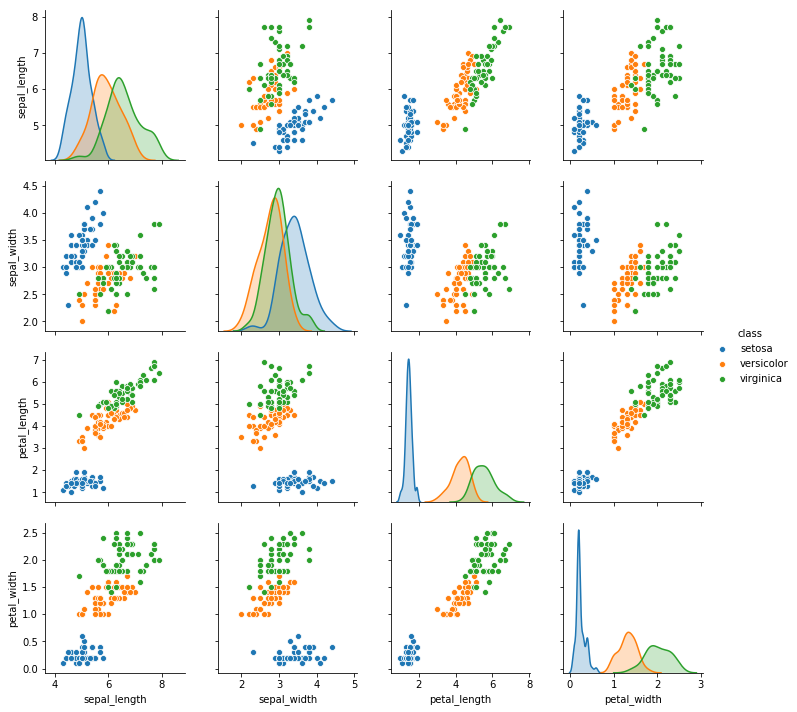

In [3]:
import seaborn as sns

pp = sns.pairplot(df, hue="class")

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Predicting

In [13]:
# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

inputs = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

encoder = pre.LabelBinarizer()
encoder.fit(df['class'])
outputs = encoder.transform(df['class'])

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 4.
model.add(kr.layers.Dense(units=64, activation='relu', input_dim=4))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=3, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the neural network.
model.fit(inputs, outputs, epochs=2, batch_size=10)

Epoch 1/2
150/150 [==============================] - 1s 6ms/step - loss: 1.1811
Epoch 2/2
150/150 [==============================] - 0s 322us/step - loss: 0.9819


In [12]:
df[df['class'] == 'versicolor'].mean()

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [16]:
import numpy as np

model.predict(np.array([(5.936, 2.770, 4.260, 1.326)]))

array([[0.07526421, 0.7021175 , 0.22261836]], dtype=float32)

In [17]:
encoder.inverse_transform(model.predict(np.array([(5.936, 2.770, 4.260, 1.326)])))

array(['versicolor'], dtype='<U10')

## Graphics

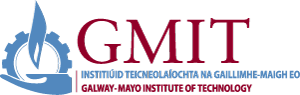

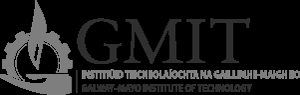

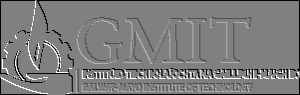

In [23]:
# You need to install Pillow for this first: conda install -c anaconda pillow

import urllib.request
import io
import PIL.Image

URL = 

with urllib.request.urlopen(URL) as url:
    imagefile = io.BytesIO(url.read())
    image = PIL.Image.open(imagefile)
    imagebw = image.convert('L')
    imageboss = imagebw.filter(ImageFilter.EMBOSS)

display(image, imagebw, imageboss)

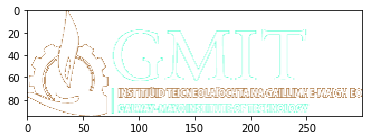

In [52]:
import matplotlib.pyplot as plt

import skimage
import skimage.io
import skimage.color
import skimage.data

img_orig = skimage.io.imread('http://www.gmit.ie/sites/all/themes/gmitpublic/images/gmit_logo.png')
img_bw = skimage.color.gray2rgb(img_orig)

plt.imshow(~img_orig)

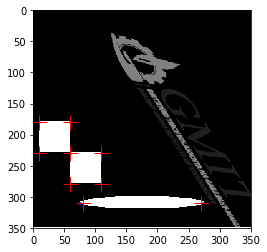

In [31]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse
import skimage.color


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7, translation=(210, 50))
image = warp(), tform.inverse, output_shape=(350, 350))
rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 350, 350, 0))
plt.show()